In [5]:
import os, sys; sys.path.append(os.path.abspath('../'))
import scipy.io
import numpy as np
# sns heatmap grid plot
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Crawl the data directory
def get_data_files(data_dir = r'..\data\baseline', n_networks = 5):

    data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
    # loop over the files


    All_network_X = []
    All_network_y = []

    for f in data_files[:n_networks]:
        data = scipy.io.loadmat(f)
        test_x = data['test_x']
        test_out = data['test_out']

        All_network_X.append(test_x)
        All_network_y.append(test_out)

    All_network_X = np.array(All_network_X)
    All_network_y = np.array(All_network_y)

    y_last_50_avg = All_network_y[:, :, :, -50:]
    y_last_50_avg = np.average(y_last_50_avg, axis=3)
    y_last_50_avg = y_last_50_avg.reshape(y_last_50_avg.shape[0], -1)


    # for every value in y_last_50_avg, if it is greater than 0, set it to 1, else set it to -1
    y_last_50_avg[y_last_50_avg > 0] = 1
    y_last_50_avg[y_last_50_avg < 0] = -1
    
    x_nuron_avg = np.average(All_network_X, axis=3)
    x_nuron_avg = x_nuron_avg.reshape(10, 4*50, 300)

    print(x_nuron_avg.shape, y_last_50_avg.shape)

    return x_nuron_avg[:n_networks], y_last_50_avg[:n_networks]

In [8]:
# Crawl the data directory
def get_data_files_tiny(data_dir = r'..\data\baseline', n_networks = 5):

    data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
    # loop over the files


    All_network_X = []
    All_network_y = []

    for f in data_files[:10]:
        data = scipy.io.loadmat(f)
        test_x = data['test_x']
        test_out = data['test_out']

        All_network_X.append(test_x)
        All_network_y.append(test_out)

    All_network_X = np.array(All_network_X)
    All_network_y = np.array(All_network_y)

    All_network_X = np.average(All_network_X, axis=2)
    All_network_y = np.average(All_network_y, axis=2)

    All_network_X = np.average(All_network_X, axis=2)

    print(All_network_X.shape, All_network_y.shape)


    return All_network_X[:n_networks], All_network_X[:n_networks]

In [6]:
# Crawl the data directory
def flow_from_mat(data_dir, n_networks = 5, binarize_y = True, average_x = True):

    data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
    # loop over the files

    all_x = np.empty(n_networks)
    all_y = np.empty(n_networks)

    for i, f in enumerate(data_files[:n_networks]):
        data = scipy.io.loadmat(f)
        all_x[i] = data['test_x']
        all_y[i] = data['test_out']

    if binarize_y:
        all_y = all_y[:, :, :, -50:]
        all_y = np.average(all_y, axis=3)
        all_y = all_y.reshape(all_y.shape[0], -1)

        # for every value in all_y, if it is greater than 0, set it to 1, else set it to -1
        all_y[all_y > 0] = 1
        all_y[all_y < 0] = -1
    
    if average_x:
        all_x = np.average(all_x, axis=3)
        all_x = all_x.reshape(all_x[0], all_x[1]*all_x[2], all_x[3])

    return all_x, all_y

In [11]:
n_networks = 10

x_r, y_r = flow_from_mat(os.path.abspath(r'..data\baseline'), n_networks = n_networks)
print(x_r.shape, y_r.shape)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\monac\\Documents\\GitHub\\RSA_Investigations\\notebooks\\..data\\baseline'

In [9]:
n_networks = 10

x_r, y_r = get_data_files_tiny(n_networks = n_networks)
print(x_r.shape, y_r.shape)

(10, 4, 300) (10, 4, 300)
(10, 4, 300) (10, 4, 300)


# IMPORTANT: 
cityblock, manhattan -> L1 | euclidean -> L2 | minowski -> l3 | cosine -> cosine

### Total options

['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski', 'nan_euclidean', 'haversine']

Euclidean distance: 'euclidean', 'l2', 'sqeuclidean'
<br>
Manhattan distance: 'manhattan', 'cityblock', 'l1'
<br>
Minkowski distance: 'minkowski', 'wminkowski'
<br>
Chebyshev distance: 'chebyshev'
<br>
Mahalanobis distance: 'mahalanobis'
<br>
Correlation-based distance: 'correlation', 'cosine'
<br>
Binary distance measures: 'hamming', 'jaccard', 'dice', 'kulsinski', 'matching', 'rogerstanimoto', 'russellrao', 
<br>'sokalmichener', 'sokalsneath', 'yule'
<br>
Other distance measures: 'braycurtis', 'canberra', 'nan_euclidean', 'seuclidean', 'haversine'
<br>

## Things that dont work

'mahalanobis',     'seuclidean',     'haversine'

In [13]:
from sklearn.metrics import pairwise_distances

In [44]:
# good stuffs
different_metrics = [
    'l1', 
    'l2',
    'minkowski',
    'cosine', 
    'correlation',
    'chebyshev', 
    'braycurtis',
    'canberra',
    'nan_euclidean', 
    ]

In [45]:
x_r.shape

(10, 4, 300)

In [54]:
results = []
metrics = different_metrics
for metric in metrics:
    result = pairwise_distances(x_r.reshape(10,-1), Y=x_r.reshape(10,-1), metric=metric)
    result = pairwise_distances(x_r.reshape(10,-1), Y=x_r.reshape(10,-1), metric=metric)
    results.append(result)

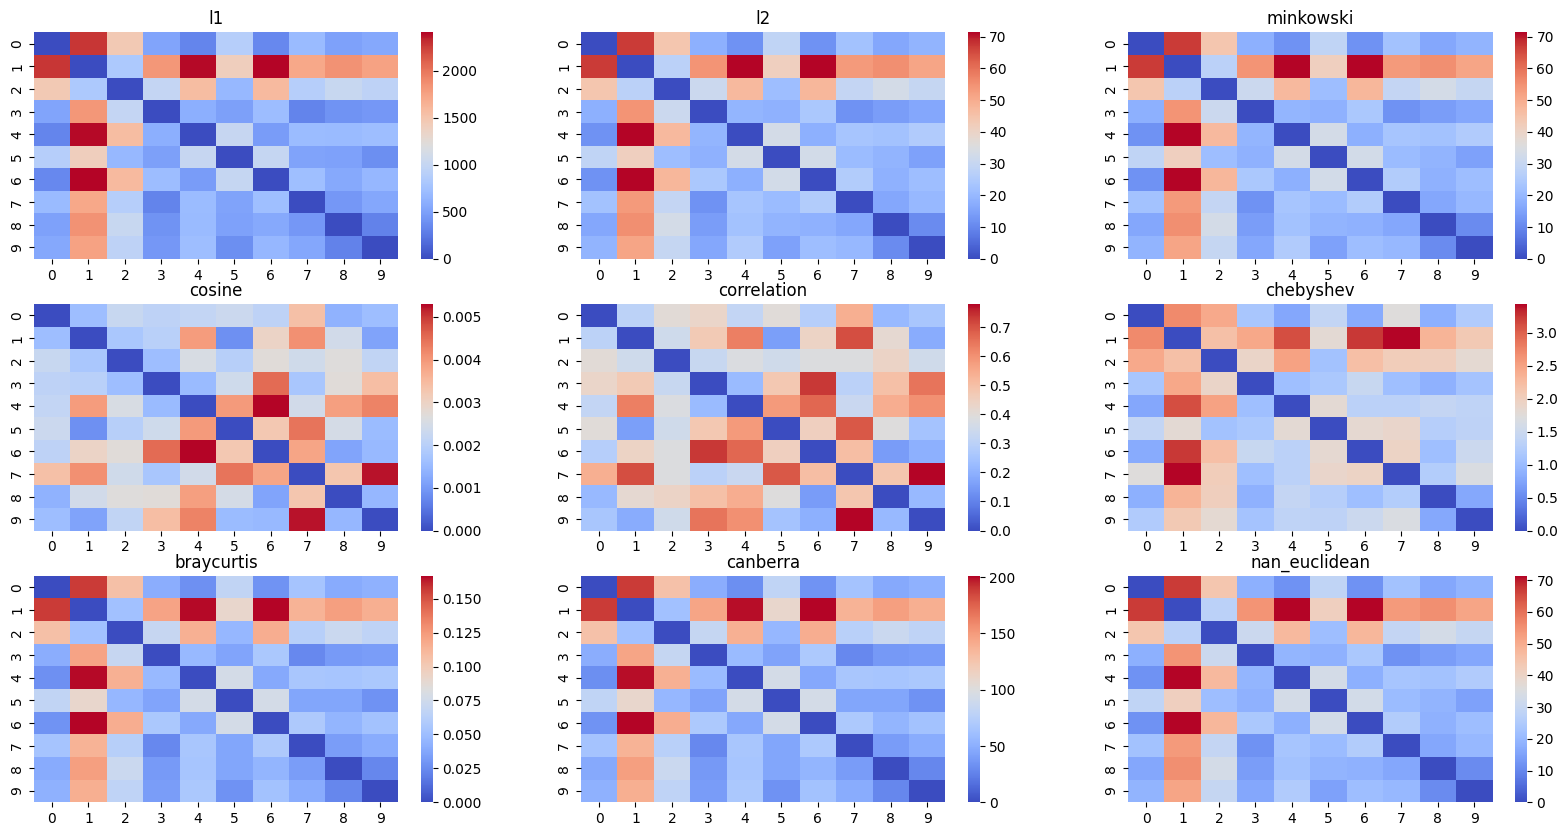

In [53]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(results[i], ax=ax, cmap='coolwarm', annot=False, fmt=".2f")
    ax.set_title(metrics[i])

In [63]:
# Min-max normalize the all the results
results = [result / np.max(result) for result in results]

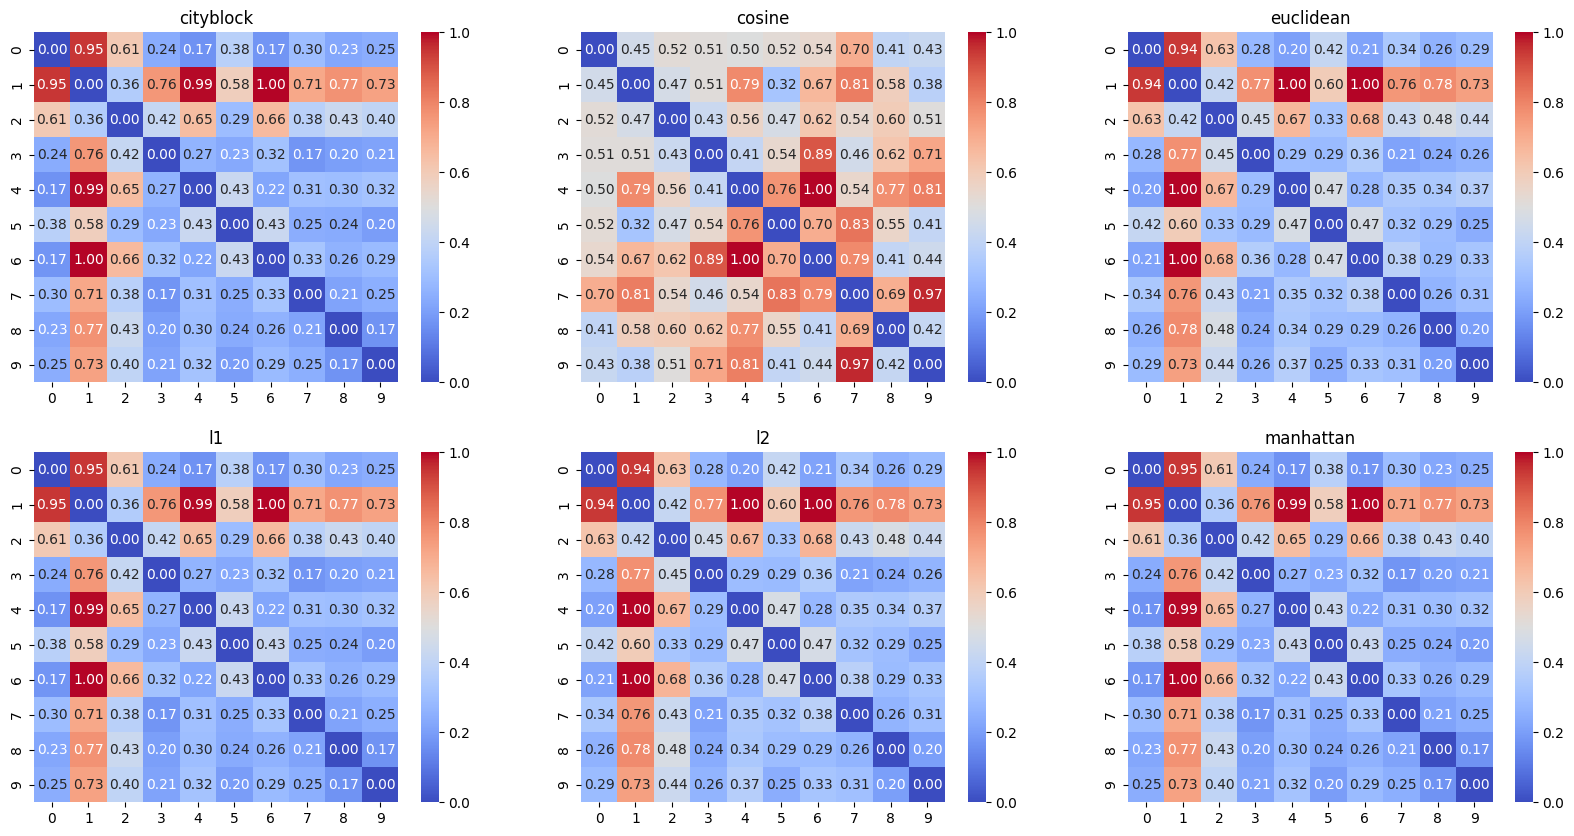

In [42]:
# sns heatmap grid plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(results[i], ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
    ax.set_title(metrics[i])

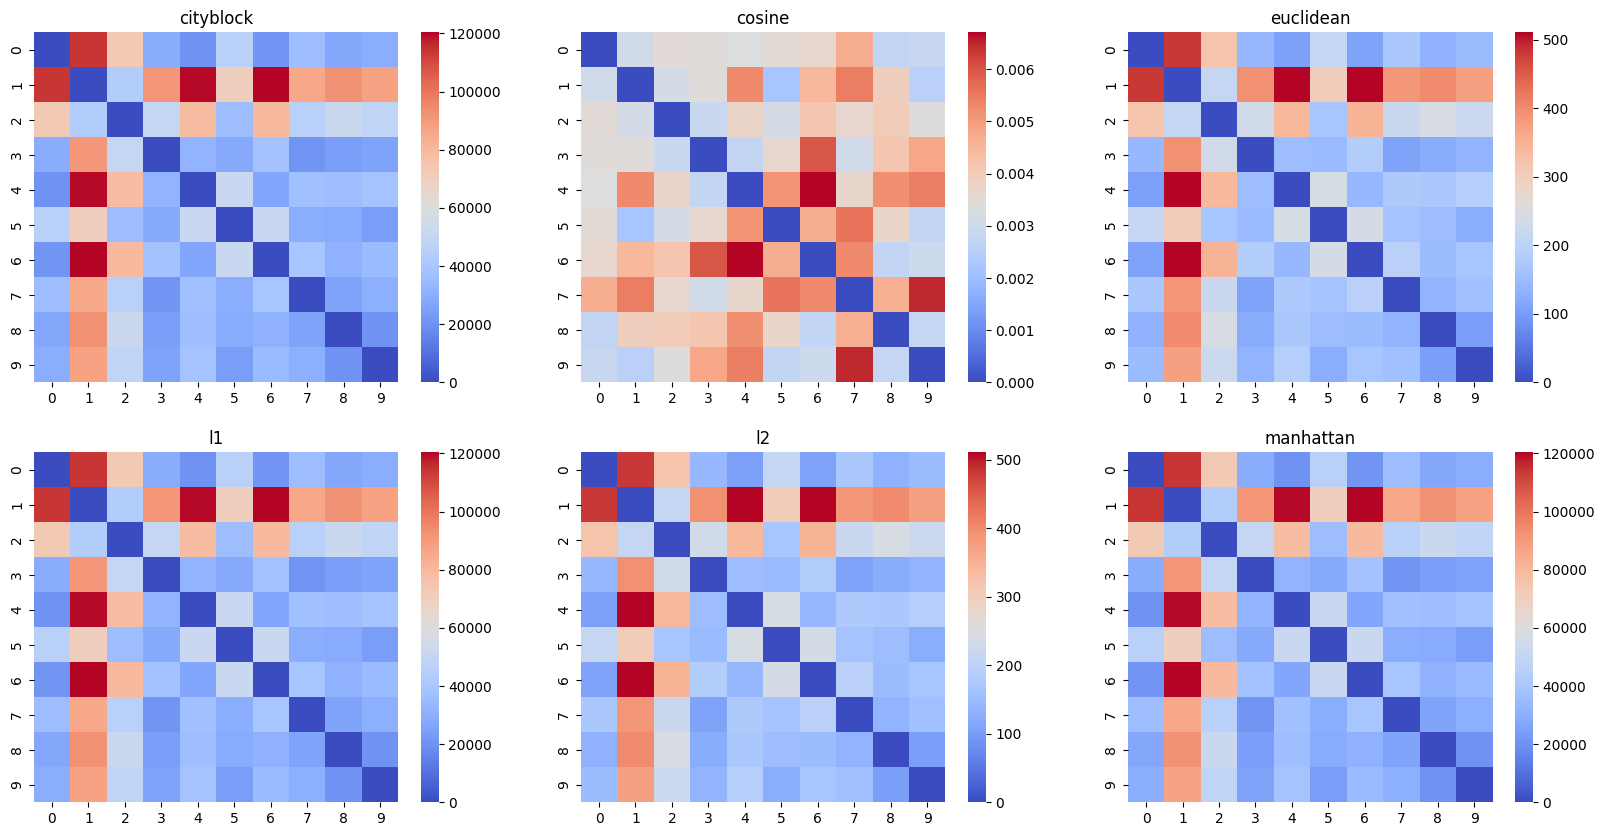

In [40]:
# sns heatmap grid plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(results[i], ax=ax, cmap='coolwarm', annot=False, fmt=".1f")
    ax.set_title(metrics[i])


In [14]:
import seaborn as sns

<Axes: >

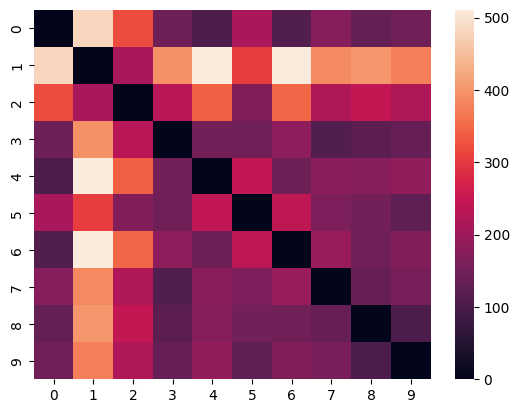

In [29]:
sns.heatmap(result)

<Axes: >

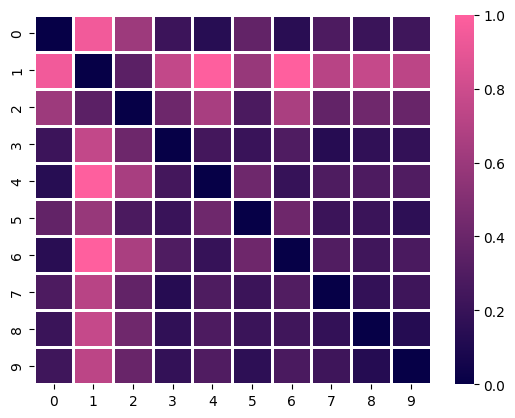

In [67]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

boundaries = [0.0, 1.0]  # custom boundaries

# here I generated twice as many colors, 
# so that I could prune the boundaries more clearly
hex_colors = ['#060047', '#FF5F9E']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)

sns.heatmap(
    vmin=0.0,
    vmax=1.0,
    data=results[0],
    cmap=custom_color_map,
    linewidths=0.75,
)

In [66]:
hex_colors

['#f0f0f3',
 '#d4d4e5',
 '#b8b8d8',
 '#9c9cca',
 '#7f7fbd',
 '#6363af',
 '#4747a2',
 '#2a2a94',
 '#0e0e87']

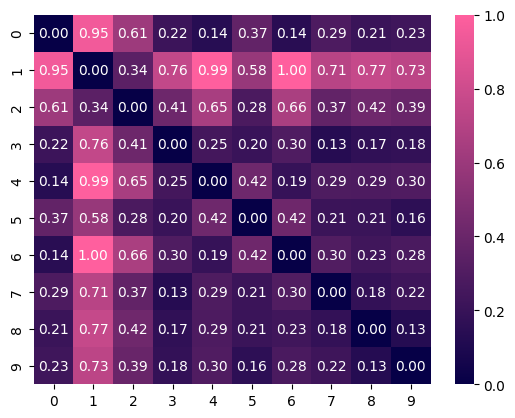

In [68]:
fig = plt.figure()
sns.heatmap(results[0], cmap=custom_color_map, annot=True, fmt=".2f")
plt.savefig('heatmap.eps', format='eps')
plt.show()